In [1]:
import random
import numpy as np
import pandas as pd

In [2]:
node_type_file_path = "node_type_ID.txt"

In [3]:
node_type_index = {}  # ID: type
users = []
pois = []

with open(node_type_file_path) as f:
    lines = f.readlines()
    for line in lines:
        line_content = line.strip().split("\t")
        node = line_content[0]
        node_type = line_content[1]
        node_type_index[node] = node_type

        if node_type == "P":
            pois.append(node)
        elif node_type == "U":
            users.append(node)

In [4]:
len(pois)

1434

In [5]:
user_map = {node_id: i for i, node_id in enumerate(users)}
poi_map = {node_id: i for i, node_id in enumerate(pois)}

In [6]:
test = pd.read_json("review_test_fixed.json", orient="split")[
    ["user_id", "business_id"]
]
test["user_id"] = test["user_id"].apply(lambda x: user_map[x])
test["business_id"] = test["business_id"].apply(lambda x: poi_map[x])
test_indices = test.drop_duplicates().to_numpy()

In [7]:
pred = np.load("a-pred.npy")

In [8]:
pred_in_test = pred[tuple(test_indices.T.tolist())]

In [9]:
not_in_test = np.ones_like(pred, dtype=bool)
not_in_test[tuple(test_indices.T.tolist())] = False
pred_not_in_test = pred[not_in_test]

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

plt.rcParams["figure.dpi"] = 300
sns.set_style("white")

In [11]:
truth_pred_df = pd.DataFrame(
    np.stack(
        [
            np.concatenate(
                [np.ones_like(pred_in_test), np.zeros_like(pred_not_in_test)]
            ),
            np.concatenate([pred_in_test, pred_not_in_test]),
        ]
    ).T
)
truth_pred_df.columns = ["Truth", "Prediction"]

(-5.0, 5.0)

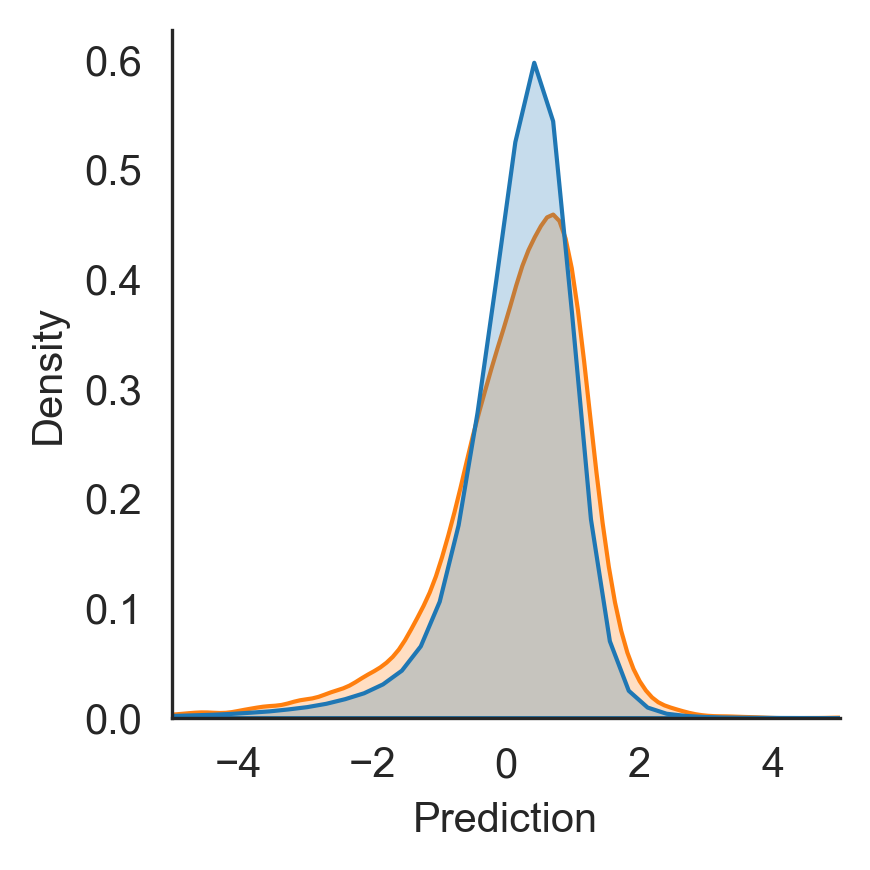

In [18]:
sns.displot(
    kind="kde",
    data=truth_pred_df,
    x="Prediction",
    hue="Truth",
    fill=True,
    legend=False,
    common_norm=False,
    height=3,
    aspect=1
)
plt.xlim((-5, 5))

In [13]:
roc_auc_score(truth_pred_df["Truth"], truth_pred_df["Prediction"])

0.5060121799591947